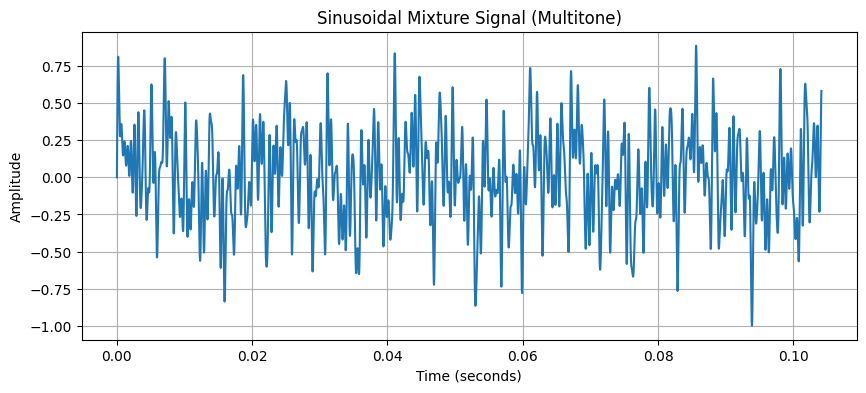

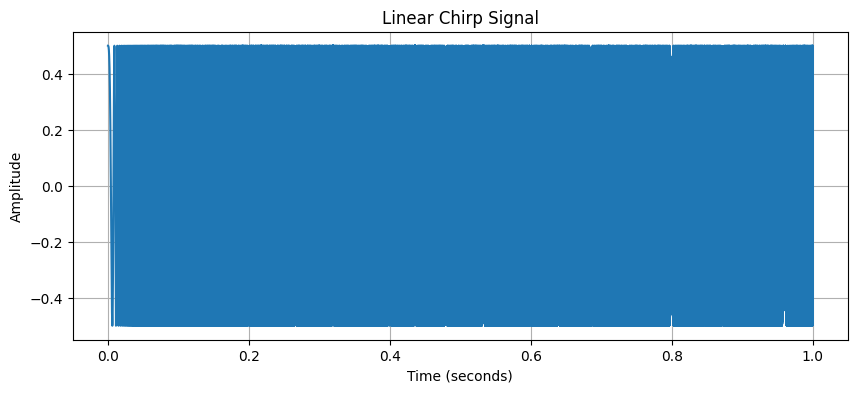

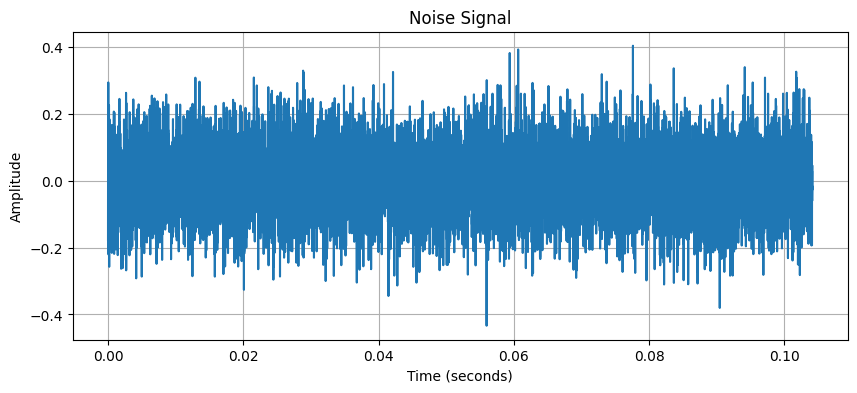

In [21]:
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)
t, x = processor.generate_bark_scale_signal(10000, 50, 2000, 10)
processor.plot_signal(t, x, 'Sinusoidal Mixture Signal (Multitone)')

t, sweepX = processor.generate_chirp_signal(1, 20, 20000, 0.5)
processor.plot_signal(t, sweepX, 'Linear Chirp Signal')


t, noise = processor.generate_noise_signal(10000, 0.1)
processor.plot_signal(t, noise, 'Noise Signal')

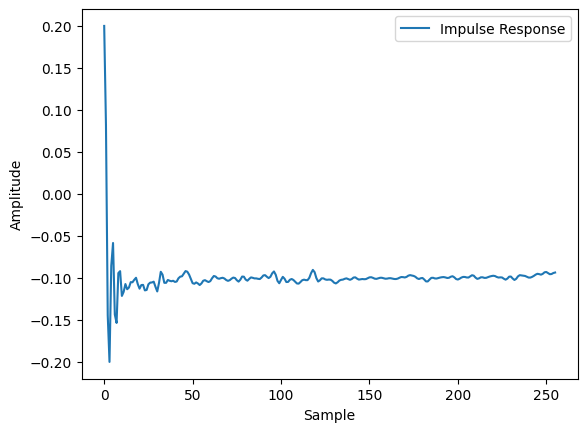

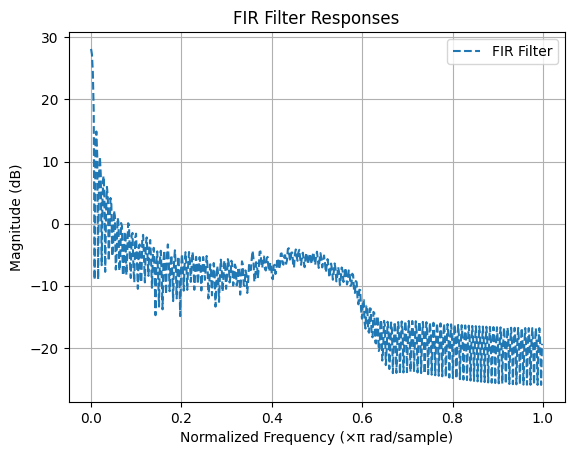

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch

#download Wav file
# !gdown --id 1_6n4KjXmFNUzXhLy-ru8ElKEFeqL_tPu

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2
plt.plot(ir,label="Impulse Response")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


# Frequency response of the optimized IIR filter
freq, response_iir_opt = freqz(ir, 1)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_iir_opt)), label='FIR Filter', linestyle='--')
plt.title('FIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


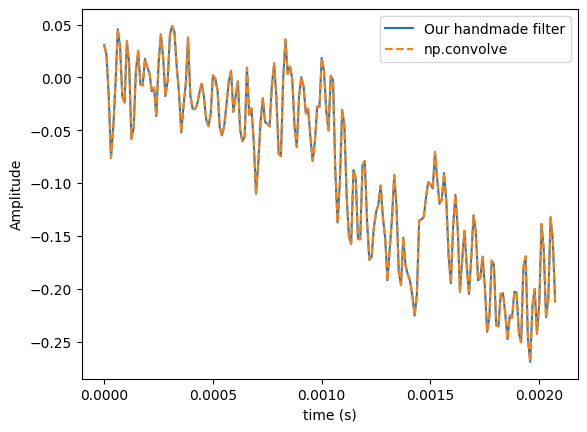

In [22]:
t, x = processor.generate_noise_signal(200, 0.1)

y=[]
buf = np.zeros(len(ir))
for n in range(len(x)):
  out, buf = processor.fir_convolution(x[n], ir ,buf)
  y.append(out)

y_ = np.convolve(x,ir)[:len(y)]

# Plot the x and y signals
plt.plot(t,y, label="Our handmade filter")
plt.plot(t,y_,'--', label="np.convolve")

# Add labels and title
plt.xlabel("time (s)")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()